In [39]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Done!')

Done!


<h2>Making a dataframe of Postcodes, apartment selling prices and location data

In [3]:
# Apartment prices, boroughs and postcodes
df_b3 = pd.read_excel('hinnat_postinumerot2.xlsx')
df_b3

,Postalcode,Square_meter_price
0,00520 ltä-Pasila,5583
1,00240 Länsi-Pasila,4812
2,00550 Vallila,5554
3,00510 Etu-Vallila - Alppila,6012
4,00130 Kaartinkaupunki,7938
5,00500 Sörnäinen,6109
6,00360 Pajamäki,4260
7,00570 Kulosaari,5512
8,00180 Kamppi - Ruoholahti,7354
9,00150 Eira - Hernesaari,7663


In [4]:
# Separate the postcode and borough
df_b3['Postcode'], df_b3['Borough'] = df_b3['Postalcode'].str.split(' ', 1).str
df_b3

,Postalcode,Square_meter_price,Postcode,Borough
0,00520 ltä-Pasila,5583,00520,ltä-Pasila
1,00240 Länsi-Pasila,4812,00240,Länsi-Pasila
2,00550 Vallila,5554,00550,Vallila
3,00510 Etu-Vallila - Alppila,6012,00510,Etu-Vallila - Alppila
4,00130 Kaartinkaupunki,7938,00130,Kaartinkaupunki
5,00500 Sörnäinen,6109,00500,Sörnäinen
6,00360 Pajamäki,4260,00360,Pajamäki
7,00570 Kulosaari,5512,00570,Kulosaari
8,00180 Kamppi - Ruoholahti,7354,00180,Kamppi - Ruoholahti
9,00150 Eira - Hernesaari,7663,00150,Eira - Hernesaari


In [5]:
# drop extra column
df_b3.drop(labels = ['Postalcode'], axis = 1 , inplace = True)
df_b3

,Square_meter_price,Postcode,Borough
0,5583,00520,ltä-Pasila
1,4812,00240,Länsi-Pasila
2,5554,00550,Vallila
3,6012,00510,Etu-Vallila - Alppila
4,7938,00130,Kaartinkaupunki
5,6109,00500,Sörnäinen
6,4260,00360,Pajamäki
7,5512,00570,Kulosaari
8,7354,00180,Kamppi - Ruoholahti
9,7663,00150,Eira - Hernesaari


In [6]:
# getting a dataset of every finnish street, with their location data
df_l = pd.read_csv('Finland_addresses.csv', encoding = 'ISO-8859-1')
df_l

,building_id,region,municipality,street,house_number,postal_code,latitude_wgs84,longitude_wgs84,building_use
0,100085724R,NaN,NaN,NaN,NaN,25830,60.061069,22.747431,2
1,100170063B,NaN,NaN,NaN,NaN,34550,62.065876,23.440770,1
2,100170070K,NaN,NaN,NaN,NaN,34550,62.109920,23.313005,2
3,100170071L,NaN,NaN,NaN,NaN,39700,61.950194,23.334864,1
4,100170072M,NaN,NaN,NaN,NaN,39700,61.949132,23.338503,1
5,100170073N,NaN,NaN,NaN,NaN,34550,62.012023,23.384178,2
6,100170078U,NaN,NaN,NaN,NaN,34180,61.746016,23.714593,2
7,100170079V,NaN,NaN,NaN,NaN,34180,61.746102,23.714451,1
8,100170082Y,NaN,NaN,NaN,NaN,34300,61.888293,23.739474,2
9,1001700852,NaN,NaN,NaN,NaN,34300,61.847150,23.818344,2


In [7]:
# Dropping non-Helsinki postal codes
df_l = df_l[df_l.postal_code < 999]
df_l

,building_id,region,municipality,street,house_number,postal_code,latitude_wgs84,longitude_wgs84,building_use
471,100007658F,1.0,444.0,NaN,NaN,0,60.289593,23.892269,2
522,1000077094,1.0,444.0,NaN,NaN,0,60.312393,23.888217,2
735,1000137234,1.0,257.0,NaN,NaN,0,60.269332,24.450918,2
4552,100063771K,1.0,257.0,NaN,NaN,0,60.239589,24.399188,2
4581,100063800H,1.0,257.0,NaN,NaN,0,60.238393,24.400005,2
4584,100063803L,1.0,257.0,NaN,NaN,0,60.238802,24.404851,1
4962,100067003U,1.0,753.0,NaN,NaN,890,60.298446,25.226580,1
5291,1000735268,1.0,257.0,NaN,NaN,0,60.233047,24.410094,2
5311,100073547X,1.0,257.0,NaN,NaN,0,60.233380,24.409670,1
5312,100073548Y,1.0,257.0,NaN,NaN,0,60.233398,24.409632,2


In [8]:
# Dropping non-Helsinki postal codes
df_l = df_l[df_l.postal_code > 0]
df_l

,building_id,region,municipality,street,house_number,postal_code,latitude_wgs84,longitude_wgs84,building_use
4962,100067003U,1.0,753.0,NaN,NaN,890,60.298446,25.226580,1
6321,100085731Y,1.0,91.0,Hiidenmaankatu,8,980,60.197052,25.123633,2
6322,100085731Y,1.0,91.0,Ruhnunkuja,1,980,60.197052,25.123633,2
6323,1000857320,1.0,91.0,Hiidenmaankatu,4,980,60.197937,25.126505,1
6324,1000857320,1.0,91.0,Naissaarenraitti,5,980,60.197937,25.126505,1
6325,1000857331,1.0,91.0,Hiidenmaankatu,4,980,60.197752,25.126172,1
6326,1000857342,1.0,91.0,Hiidenmaankatu,4,980,60.197578,25.125930,1
6327,1000857353,1.0,91.0,Naissaarenraitti,7,980,60.197434,25.126533,1
6328,1000857364,1.0,91.0,Hiidenmaankatu,6d,980,60.196905,25.125319,1
6329,1000857375,1.0,91.0,Harbonkatu,7,980,60.198192,25.126797,1


In [9]:
# Dropping non-Helsinki postal codes (some weird numbers was still left, so I filtered with municipality as well)
df_l = df_l[df_l.municipality == 91.0]
df_l

,building_id,region,municipality,street,house_number,postal_code,latitude_wgs84,longitude_wgs84,building_use
6321,100085731Y,1.0,91.0,Hiidenmaankatu,8,980,60.197052,25.123633,2
6322,100085731Y,1.0,91.0,Ruhnunkuja,1,980,60.197052,25.123633,2
6323,1000857320,1.0,91.0,Hiidenmaankatu,4,980,60.197937,25.126505,1
6324,1000857320,1.0,91.0,Naissaarenraitti,5,980,60.197937,25.126505,1
6325,1000857331,1.0,91.0,Hiidenmaankatu,4,980,60.197752,25.126172,1
6326,1000857342,1.0,91.0,Hiidenmaankatu,4,980,60.197578,25.125930,1
6327,1000857353,1.0,91.0,Naissaarenraitti,7,980,60.197434,25.126533,1
6328,1000857364,1.0,91.0,Hiidenmaankatu,6d,980,60.196905,25.125319,1
6329,1000857375,1.0,91.0,Harbonkatu,7,980,60.198192,25.126797,1
6330,1000857375,1.0,91.0,Hiidenmaankatu,2,980,60.198192,25.126797,1


In [10]:
# Adding 2 zeros to postcodes, since they should have them
df_l['postal_code'] = df_l['postal_code'].apply(lambda x: '{0:0>5}'.format(x))
df_l

/Users/joachimluttinen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,building_id,region,municipality,street,house_number,postal_code,latitude_wgs84,longitude_wgs84,building_use
6321,100085731Y,1.0,91.0,Hiidenmaankatu,8,00980,60.197052,25.123633,2
6322,100085731Y,1.0,91.0,Ruhnunkuja,1,00980,60.197052,25.123633,2
6323,1000857320,1.0,91.0,Hiidenmaankatu,4,00980,60.197937,25.126505,1
6324,1000857320,1.0,91.0,Naissaarenraitti,5,00980,60.197937,25.126505,1
6325,1000857331,1.0,91.0,Hiidenmaankatu,4,00980,60.197752,25.126172,1
6326,1000857342,1.0,91.0,Hiidenmaankatu,4,00980,60.197578,25.125930,1
6327,1000857353,1.0,91.0,Naissaarenraitti,7,00980,60.197434,25.126533,1
6328,1000857364,1.0,91.0,Hiidenmaankatu,6d,00980,60.196905,25.125319,1
6329,1000857375,1.0,91.0,Harbonkatu,7,00980,60.198192,25.126797,1
6330,1000857375,1.0,91.0,Hiidenmaankatu,2,00980,60.198192,25.126797,1


In [11]:
# Drop unnecessary columns
df_test = df_l.drop(labels = ['building_id', 'region', 'municipality', 'street', 'house_number' , 'building_use']\
                   , axis = 1)
df_test

,postal_code,latitude_wgs84,longitude_wgs84
6321,00980,60.197052,25.123633
6322,00980,60.197052,25.123633
6323,00980,60.197937,25.126505
6324,00980,60.197937,25.126505
6325,00980,60.197752,25.126172
6326,00980,60.197578,25.125930
6327,00980,60.197434,25.126533
6328,00980,60.196905,25.125319
6329,00980,60.198192,25.126797
6330,00980,60.198192,25.126797


In [12]:
# Calculating the average geographical street location in one postal code area
# (Helsinki has a lot of forest areas, so want to look the venues around the centric, populated areas)
df_avg_lat = df_test['latitude_wgs84'].groupby(df_test['postal_code'])
df_avg_lat_mean = df_avg_lat.mean()
df_lat = pd.DataFrame(df_avg_lat_mean)
df_lat

,latitude_wgs84
postal_code,
00100,60.171384
00120,60.163222
00130,60.164521
00140,60.157767
00150,60.157040
00160,60.167117
00170,60.172688
00180,60.163390
00190,60.146020


In [13]:
df_avg_lon = df_test['longitude_wgs84'].groupby(df_test['postal_code'])
#regiment_preScore = df['preTestScore'].groupby(df['regiment'])
df_avg_lon_mean = df_avg_lon.mean()
df_lon = pd.DataFrame(df_avg_lon_mean)
df_lon

,longitude_wgs84
postal_code,
00100,24.931538
00120,24.939086
00130,24.948625
00140,24.952463
00150,24.936818
00160,24.968378
00170,24.955500
00180,24.918868
00190,24.985074


In [14]:
# Bringing the lat and long data to one dataframe, and then bringing them to apartment price dataset
df_data = pd.merge(df_lat, df_lon, on='postal_code')
df_data

,latitude_wgs84,longitude_wgs84
postal_code,,
00100,60.171384,24.931538
00120,60.163222,24.939086
00130,60.164521,24.948625
00140,60.157767,24.952463
00150,60.157040,24.936818
00160,60.167117,24.968378
00170,60.172688,24.955500
00180,60.163390,24.918868
00190,60.146020,24.985074


In [15]:
df_df = pd.merge(df_b3, df_data, left_on = 'Postcode', right_on = 'postal_code')
df_df

,Square_meter_price,Postcode,Borough,latitude_wgs84,longitude_wgs84
0,5583,00520,ltä-Pasila,60.198406,24.940994
1,4812,00240,Länsi-Pasila,60.201654,24.923332
2,5554,00550,Vallila,60.195758,24.962147
3,6012,00510,Etu-Vallila - Alppila,60.191818,24.949809
4,7938,00130,Kaartinkaupunki,60.164521,24.948625
5,6109,00500,Sörnäinen,60.187329,24.960084
6,4260,00360,Pajamäki,60.218095,24.856765
7,5512,00570,Kulosaari,60.183882,25.005540
8,7354,00180,Kamppi - Ruoholahti,60.163390,24.918868
9,7663,00150,Eira - Hernesaari,60.157040,24.936818


In [16]:
# Final beautification
df_df.columns = ['Square_meter_price', 'Postcode', 'Borough', 'Latitude', 'Longitude']
df_df.head()

,Square_meter_price,Postcode,Borough,Latitude,Longitude
0,5583,00520,ltä-Pasila,60.198406,24.940994
1,4812,00240,Länsi-Pasila,60.201654,24.923332
2,5554,00550,Vallila,60.195758,24.962147
3,6012,00510,Etu-Vallila - Alppila,60.191818,24.949809
4,7938,00130,Kaartinkaupunki,60.164521,24.948625


---
<h2>Visualizing of the data

In [17]:
# Find the average postcode location
lat_hel = df_df['Latitude'].mean()
lon_hel = df_df['Longitude'].mean()

# Create the map
map_hel = folium.Map(location=[lat_hel, lon_hel], zoom_start=11)

# Add markers to map
for lat, lng, postal in zip(df_df['Latitude'], df_df['Longitude'], df_df['Postcode']):
    label = str(postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hel)  
    
map_hel

<BarContainer object of 73 artists>

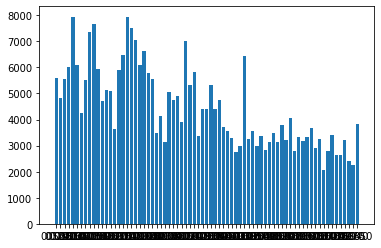

In [18]:
ax = plt.bar(x = df_df['Postcode'], height= df_df['Square_meter_price'] )
ax

---
<h2>Getting the venue data from Foursquare

In [19]:
CLIENT_ID = 'QWLCP23OCLYX2UKU0CEWQYGUANZ4O4HNWMQNYYBJCWBLYEJF' # your Foursquare ID
CLIENT_SECRET = 'O4NNG3EFRYMZXDPIA0EU4LMAGAEI1NZKJKY0JT3FQJLPRP0Q' # your Foursquare Secret
VERSION = '20180604'
radius = 800 # Using 800m since that is a reasonable walking distance for person living in that area
LIMIT = 100
def getNearbyVenues(names, lats, lons, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, lats, lons):
            
        # create the API request URL
# https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}
        #url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode_latitude', 
                  'Postcode_longitude', 
                  'Venue', 
                  'Venue_latitude', 
                  'Venue_longitude', 
                  'Venue_category']
    
    return(nearby_venues)
helsinki_venues = getNearbyVenues(names = df_df['Postcode'],
                                   lats = df_df['Latitude'],
                                   lons = df_df['Longitude']
                                  )

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb27f964a520eb6121e3', 'name': 'Mäkelänrinteen uintikeskus', 'location': {'address': 'Mäkelänkatu 49', 'lat': 60.19982199767463, 'lng': 24.947245764074314, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19982199767463, 'lng': 24.947245764074314}], 'distance': 380, 'postalCode': '00550', 'cc': 'FI', 'neighborhood': 'Vallila', 'city': 'Helsinki', 'state': 'Southern Finland', 'country': 'Suomi', 'formattedAddress': ['Mäkelänkatu 49', '00550 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb27f964a520eb6121e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot i

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ce0e1bd94c3b60c59c473ea', 'name': 'Suomen Urheiluhierojaopisto', 'location': {'address': 'Pasilan puistotie 6', 'lat': 60.198119636992374, 'lng': 24.924911602909518, 'labeledLatLngs': [{'label': 'display', 'lat': 60.198119636992374, 'lng': 24.924911602909518}], 'distance': 403, 'postalCode': '00240', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Pasilan puistotie 6', '00240 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'Massage Studio', 'pluralName': 'Massage Studios', 'shortName': 'Massage Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ce0e1bd94c3b60c59c473ea-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is p

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55044665498e3c6d80a150f6', 'name': 'Mashiro', 'location': {'address': 'Mäkelänkatu 22', 'crossStreet': 'Suvannontie', 'lat': 60.193697, 'lng': 24.958275, 'labeledLatLngs': [{'label': 'display', 'lat': 60.193697, 'lng': 24.958275}], 'distance': 313, 'postalCode': '00510', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mäkelänkatu 22 (Suvannontie)', '00510 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55044665498e3c6d80a150f6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51310f45e4b041d1c6ce5c38', 'name': 'Ääniwalli', 'location': {'address': 'Pälkäneentie 13', 'lat': 60.19505023692134, 'lng': 24.949734419397203, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19505023692134, 'lng': 24.949734419397203}], 'distance': 359, 'postalCode': '00510', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Pälkäneentie 13', '00510 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-51310f45e4b041d1c6ce5c38-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55c9a7f0498ebc3c626f5c9f', 'name': 'Lilla Roberts', 'location': {'address': 'Pieni Roobertinkatu 1-3', 'lat': 60.1643255552438, 'lng': 24.947082418717436, 'labeledLatLngs': [{'label': 'display', 'lat': 60.1643255552438, 'lng': 24.947082418717436}], 'distance': 88, 'postalCode': '00130', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Pieni Roobertinkatu 1-3', '00130 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55c9a7f0498ebc3c626f5c9f-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reason

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56718e91498e08291d65c9a4', 'name': 'Riviera', 'location': {'address': 'Harjukatu 2', 'lat': 60.187863, 'lng': 24.9577, 'labeledLatLngs': [{'label': 'display', 'lat': 60.187863, 'lng': 24.9577}], 'distance': 144, 'postalCode': '00500', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Harjukatu 2', '00500 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d17e941735', 'name': 'Indie Movie Theater', 'pluralName': 'Indie Movie Theaters', 'shortName': 'Indie Movies', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-56718e91498e08291d65c9a4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'glo

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be415fe910020a1b731d114', 'name': 'Helsingin Golfklubi', 'location': {'address': 'Talin puistotie 12', 'lat': 60.211829797532204, 'lng': 24.85980749130249, 'labeledLatLngs': [{'label': 'display', 'lat': 60.211829797532204, 'lng': 24.85980749130249}], 'distance': 717, 'postalCode': '00380', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Talin puistotie 12', '00380 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4be415fe910020a1b731d114-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '559c012f498e993dc83b7147', 'name': 'Chengdu Ravintola', 'location': {'address': 'Svinhufvudintie 1', 'lat': 60.18631077041685, 'lng': 25.007735486660074, 'labeledLatLngs': [{'label': 'display', 'lat': 60.18631077041685, 'lng': 25.007735486660074}], 'distance': 296, 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Svinhufvudintie 1', 'Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-559c012f498e993dc83b7147-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1972caf964a52088dd23e3', 'name': 'One Pint Pub', 'location': {'address': 'Santakatu 2', 'crossStreet': 'Ruoholahti', 'lat': 60.162014265266144, 'lng': 24.92006656021696, 'labeledLatLngs': [{'label': 'display', 'lat': 60.162014265266144, 'lng': 24.92006656021696}], 'distance': 166, 'postalCode': '00180', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Santakatu 2 (Ruoholahti)', '00180 Helsinki', 'Suomi']}, 'categories': [{'id': '56aa371ce4b08b9a8d57356c', 'name': 'Beer Bar', 'pluralName': 'Beer Bars', 'shortName': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b1972caf964a52088dd23e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57efdeee498ede2cc3c95017', 'name': 'BasBas & Staff', 'location': {'address': 'Tehtaankatu 27-29', 'crossStreet': 'Telakkakatu', 'lat': 60.15779514871246, 'lng': 24.933654447227262, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15779514871246, 'lng': 24.933654447227262}], 'distance': 194, 'postalCode': '00150', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Tehtaankatu 27-29 (Telakkakatu)', '00150 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d123941735', 'name': 'Wine Bar', 'pluralName': 'Wine Bars', 'shortName': 'Wine Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57efdeee498ede2cc3c95017-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '575bd122498e832d637722c2', 'name': 'Roji', 'location': {'address': 'Kolmas linja 16', 'lat': 60.18289, 'lng': 24.947634, 'labeledLatLngs': [{'label': 'display', 'lat': 60.18289, 'lng': 24.947634}], 'distance': 161, 'postalCode': '00530', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kolmas linja 16', '00530 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi Restaurants', 'shortName': 'Sushi', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-575bd122498e832d637722c2-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52e7eaae498e125fe2cf3550', 'name': 'Boulderkeskus Isatis', 'location': {'address': 'Mekaanikonkatu 15 A', 'lat': 60.20394154390821, 'lng': 25.047843630072872, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20394154390821, 'lng': 25.047843630072872}], 'distance': 629, 'postalCode': '00880', 'cc': 'FI', 'state': 'Southern Finland', 'country': 'Suomi', 'formattedAddress': ['Mekaanikonkatu 15 A', '00880', 'Suomi']}, 'categories': [{'id': '503289d391d4c4b30a586d6a', 'name': 'Climbing Gym', 'pluralName': 'Climbing Gyms', 'shortName': 'Climbing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-52e7eaae498e125fe2cf3550-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'rea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '557ef54e498ec5c4b288d1b7', 'name': 'Kahvila Siili', 'location': {'address': 'Ilmattarentie 8 C', 'lat': 60.208706227627225, 'lng': 24.939309403666364, 'labeledLatLngs': [{'label': 'display', 'lat': 60.208706227627225, 'lng': 24.939309403666364}], 'distance': 615, 'postalCode': '00610', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Ilmattarentie 8 C', '00610 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-557ef54e498ec5c4b288d1b7-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1970e2f964a52064dd23e3', 'name': 'Alppiruusupuisto', 'location': {'address': 'Laajasuontie 40', 'lat': 60.22202523911977, 'lng': 24.893418593495483, 'labeledLatLngs': [{'label': 'display', 'lat': 60.22202523911977, 'lng': 24.893418593495483}], 'distance': 698, 'postalCode': '00320', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Laajasuontie 40', '00320 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d15a941735', 'name': 'Garden', 'pluralName': 'Gardens', 'shortName': 'Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/garden_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b1970e2f964a52064dd23e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bffa7faca1920a1640ded81', 'name': 'Lidl', 'location': {'address': 'Pakilantie 46-48', 'lat': 60.23666132890597, 'lng': 24.928743615746495, 'labeledLatLngs': [{'label': 'display', 'lat': 60.23666132890597, 'lng': 24.928743615746495}], 'distance': 466, 'postalCode': '00660', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Pakilantie 46-48', '00660 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '533589295'}}, 'referralId': 'e-0-4bffa7faca1920a1640ded81-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot i

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd5bd7acfa7b713584a26da', 'name': 'Leikkipuisto Lahnalahti', 'location': {'address': 'Lauttasaarentie 40–42', 'lat': 60.15990670654791, 'lng': 24.876335636941416, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15990670654791, 'lng': 24.876335636941416}], 'distance': 286, 'postalCode': '00200', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Lauttasaarentie 40–42', '00200 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e7941735', 'name': 'Playground', 'pluralName': 'Playgrounds', 'shortName': 'Playground', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/playground_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bd5bd7acfa7b713584a26da-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c5e9b53bfa595213a0e8dff', 'name': 'Kirjailijanpuisto', 'location': {'address': 'Minna Canthinkatu', 'lat': 60.18598514854521, 'lng': 24.914046889061616, 'labeledLatLngs': [{'label': 'display', 'lat': 60.18598514854521, 'lng': 24.914046889061616}], 'distance': 170, 'postalCode': '00250', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Minna Canthinkatu', '00250 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c5e9b53bfa595213a0e8dff-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonN

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb22f964a520826021e3', 'name': 'Kaivopuisto / Brunnsparken (Kaivopuisto)', 'location': {'lat': 60.15680978091396, 'lng': 24.95673179626465, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15680978091396, 'lng': 24.95673179626465}], 'distance': 259, 'postalCode': '00140', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kaivopuisto', '00140 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb22f964a520826021e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInte

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54c76f54498eb34a1cf458ad', 'name': 'Levant', 'location': {'address': 'Bulevardi 15', 'crossStreet': 'Fredrikinkatu', 'lat': 60.164130694350206, 'lng': 24.93653069038648, 'labeledLatLngs': [{'label': 'display', 'lat': 60.164130694350206, 'lng': 24.93653069038648}], 'distance': 173, 'postalCode': '00120', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Bulevardi 15 (Fredrikinkatu)', '00120 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d115941735', 'name': 'Middle Eastern Restaurant', 'pluralName': 'Middle Eastern Restaurants', 'shortName': 'Middle Eastern', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-54c76f54498eb34a1cf458ad-0'}, {'reasons': {'count'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb23f964a520dc6021e3', 'name': 'Taidehalli', 'location': {'address': 'Nervanderinkatu 3', 'lat': 60.172127213487165, 'lng': 24.93101423081712, 'labeledLatLngs': [{'label': 'display', 'lat': 60.172127213487165, 'lng': 24.93101423081712}], 'distance': 87, 'postalCode': '00100', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Nervanderinkatu 3', '00100 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e2931735', 'name': 'Art Gallery', 'pluralName': 'Art Galleries', 'shortName': 'Art Gallery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb23f964a520dc6021e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'ty

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5308a60d498e088bdc45e1ab', 'name': 'Bon Temps Café', 'location': {'address': 'Mannerheimintie 132', 'lat': 60.1934, 'lng': 24.9062, 'labeledLatLngs': [{'label': 'display', 'lat': 60.1934, 'lng': 24.9062}], 'distance': 319, 'postalCode': '00270', 'cc': 'FI', 'neighborhood': 'Meilahti', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mannerheimintie 132', '00270 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5308a60d498e088bdc45e1ab-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'rea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '508e4f98e4b0988213119e0e', 'name': 'Sushi Wagocoro', 'location': {'address': 'Runeberginkatu 63 A', 'lat': 60.180714, 'lng': 24.925304, 'labeledLatLngs': [{'label': 'display', 'lat': 60.180714, 'lng': 24.925304}], 'distance': 215, 'postalCode': '00260', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Runeberginkatu 63 A', '00260 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi Restaurants', 'shortName': 'Sushi', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-508e4f98e4b0988213119e0e-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInte

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c177d85f256a5934e9eec3e', 'name': 'Alvar Aallon koti ja toimisto / Aalto House (Alvar Aallon koti ja toimisto)', 'location': {'address': 'Riihitie 20', 'lat': 60.19691529877524, 'lng': 24.876517863556504, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19691529877524, 'lng': 24.876517863556504}], 'distance': 103, 'postalCode': '00330', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Riihitie 20', '00330 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d18f941735', 'name': 'Art Museum', 'pluralName': 'Art Museums', 'shortName': 'Art Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_art_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c177d85f256a5934e9eec3e-0'}, {'reasons': {'count': 0,

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5013f43ee4b010591f6fe1c5', 'name': 'Gurans', 'location': {'address': 'Mannerheimintie 168', 'crossStreet': 'Korppaanmäentie', 'lat': 60.20300543404889, 'lng': 24.89864280841107, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20300543404889, 'lng': 24.89864280841107}], 'distance': 336, 'postalCode': '00300', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mannerheimintie 168 (Korppaanmäentie)', '00300 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5013f43ee4b010591f6fe1c5-0'}, {'reasons': {'count': 0, 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5533a6eb498ed9e3d6bb80e4', 'name': 'Roihuvuoren Rio', 'location': {'lat': 60.198363006325664, 'lng': 25.058131326199472, 'labeledLatLngs': [{'label': 'display', 'lat': 60.198363006325664, 'lng': 25.058131326199472}], 'distance': 274, 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5533a6eb498ed9e3d6bb80e4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf6c55c508c0f4770d53c31', 'name': 'Jap

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55bcc6d3498ed67b72eebdd6', 'name': 'Cafe Makiata', 'location': {'address': 'Aino Acktén tie 8', 'lat': 60.225626, 'lng': 24.894698, 'labeledLatLngs': [{'label': 'display', 'lat': 60.225626, 'lng': 24.894698}], 'distance': 203, 'postalCode': '00400', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Aino Acktén tie 8', '00400 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55bcc6d3498ed67b72eebdd6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5bfeca701af8520039e51c10', 'name': 'IMAX® Premium', 'location': {'address': 'Finnkino Itis', 'crossStreet': 'Itäkatu 1-7', 'lat': 60.211586640873485, 'lng': 25.083338861878865, 'labeledLatLngs': [{'label': 'display', 'lat': 60.211586640873485, 'lng': 25.083338861878865}], 'distance': 464, 'postalCode': '00930', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Finnkino Itis (Itäkatu 1-7)', '00930 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d17f941735', 'name': 'Movie Theater', 'pluralName': 'Movie Theaters', 'shortName': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5bfeca701af8520039e51c10-0'}, {'reasons': {'count': 0, 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb27f964a520e46121e3', 'name': 'Talin Tenniskeskus', 'location': {'address': 'Kutomokuja 4, Talin Urheilupuisto', 'crossStreet': 'Kutomokuja 4', 'lat': 60.21306079999999, 'lng': 24.8751351, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21306079999999, 'lng': 24.8751351}], 'distance': 503, 'postalCode': '00380', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kutomokuja 4, Talin Urheilupuisto (Kutomokuja 4)', '00380 Helsinki', 'Suomi']}, 'categories': [{'id': '4e39a956bd410d7aed40cbc3', 'name': 'Tennis Court', 'pluralName': 'Tennis Courts', 'shortName': 'Tennis Court', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_tennis_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb27f964a520e46121e3-0'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb23f964a520ad6021e3', 'name': 'Didrichsenin taidemuseo', 'location': {'address': 'Kuusilahdenkuja 1', 'lat': 60.18516400060772, 'lng': 24.856646790755256, 'labeledLatLngs': [{'label': 'display', 'lat': 60.18516400060772, 'lng': 24.856646790755256}], 'distance': 384, 'postalCode': '00340', 'cc': 'FI', 'neighborhood': 'Kuusisaari', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kuusilahdenkuja 1', '00340 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d18f941735', 'name': 'Art Museum', 'pluralName': 'Art Museums', 'shortName': 'Art Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_art_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb23f964a520ad6021e3-0'}, {'reasons': {'count': 0, 'items': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c0d187b54d5b7130c3d0e56', 'name': 'Herttoniemenrannan liikuntapuisto', 'location': {'address': 'Paasivaaranpolku 6', 'lat': 60.19024312714912, 'lng': 25.02872048972691, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19024312714912, 'lng': 25.02872048972691}], 'distance': 278, 'postalCode': '00810', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Paasivaaranpolku 6', '00810 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a26', 'name': 'Recreation Center', 'pluralName': 'Recreation Centers', 'shortName': 'Recreation Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c0d187b54d5b7130c3d0e56-0'}, {'reasons': {'count': 0, 'items': [{'summ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd9c8c62e6f0f472af70b08', 'name': 'K-Supermarket Mustapekka', 'location': {'address': 'Mäkitorpantie 1', 'lat': 60.221888492807466, 'lng': 24.948044759885246, 'labeledLatLngs': [{'label': 'display', 'lat': 60.221888492807466, 'lng': 24.948044759885246}], 'distance': 371, 'postalCode': '00620', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mäkitorpantie 1', '00620 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bd9c8c62e6f0f472af70b08-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54b7afd7498e14dd463285e8', 'name': 'Cafe LOV', 'location': {'address': 'Mariankatu 13 B', 'lat': 60.17128440157881, 'lng': 24.95662282949953, 'labeledLatLngs': [{'label': 'display', 'lat': 60.17128440157881, 'lng': 24.95662282949953}], 'distance': 168, 'postalCode': '00170', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mariankatu 13 B', '00170 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-54b7afd7498e14dd463285e8-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionR

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf29b58767076b0c971bf98', 'name': 'Arabian rantapuisto', 'location': {'address': 'Arabianranta', 'lat': 60.21026662341423, 'lng': 24.981686446654166, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21026662341423, 'lng': 24.981686446654166}], 'distance': 502, 'postalCode': '00560', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Arabianranta', '00560 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf29b58767076b0c971bf98-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'g

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5450c3ad498efe95d3048f7a', 'name': 'Borneo', 'location': {'lat': 60.15222309230531, 'lng': 24.879902267680283, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15222309230531, 'lng': 24.879902267680283}], 'distance': 186, 'cc': 'FI', 'country': 'Suomi', 'formattedAddress': ['Suomi']}, 'categories': [{'id': '4bf58dd8d48988d156941735', 'name': 'Malay Restaurant', 'pluralName': 'Malay Restaurants', 'shortName': 'Malay', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/malaysian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5450c3ad498efe95d3048f7a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50b9c231e4b0046dd88f33ac', 'name': 'Vetosali', 'location': {'address': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cb80b2190c9a143a4637cd6', 'name': 'Golden Pizza Kebab', 'location': {'address': 'Vanhaistentie 3', 'lat': 60.242399387967374, 'lng': 24.885465842351845, 'labeledLatLngs': [{'label': 'display', 'lat': 60.242399387967374, 'lng': 24.885465842351845}], 'distance': 364, 'postalCode': '00420', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Vanhaistentie 3', '00420 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cb80b2190c9a143a4637cd6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 're

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a46722a3b83076b585f0601', 'name': 'Ristorante Bello', 'location': {'address': 'Maakaari 9 A 1', 'lat': 60.229019505043745, 'lng': 25.028472602334062, 'labeledLatLngs': [{'label': 'display', 'lat': 60.229019505043745, 'lng': 25.028472602334062}], 'distance': 174, 'postalCode': '00790', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Maakaari 9 A 1', '00790 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5a46722a3b83076b585f0601-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52627ba0498e2c4ebd91722f', 'name': 'Takeaway Famia Sushibar', 'location': {'address': 'Tunnelitie 2', 'lat': 60.21604185362387, 'lng': 24.89846559750012, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21604185362387, 'lng': 24.89846559750012}], 'distance': 669, 'postalCode': '00320', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Tunnelitie 2', '00320 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi Restaurants', 'shortName': 'Sushi', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-52627ba0498e2c4ebd91722f-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5013f43ee4b010591f6fe1c5', 'name': 'Gurans', 'location': {'address': 'Mannerheimintie 168', 'crossStreet': 'Korppaanmäentie', 'lat': 60.20300543404889, 'lng': 24.89864280841107, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20300543404889, 'lng': 24.89864280841107}], 'distance': 262, 'postalCode': '00300', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mannerheimintie 168 (Korppaanmäentie)', '00300 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5013f43ee4b010591f6fe1c5-0'}, {'reasons': {'count': 0, 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb27f964a520e46121e3', 'name': 'Talin Tenniskeskus', 'location': {'address': 'Kutomokuja 4, Talin Urheilupuisto', 'crossStreet': 'Kutomokuja 4', 'lat': 60.21306079999999, 'lng': 24.8751351, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21306079999999, 'lng': 24.8751351}], 'distance': 667, 'postalCode': '00380', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kutomokuja 4, Talin Urheilupuisto (Kutomokuja 4)', '00380 Helsinki', 'Suomi']}, 'categories': [{'id': '4e39a956bd410d7aed40cbc3', 'name': 'Tennis Court', 'pluralName': 'Tennis Courts', 'shortName': 'Tennis Court', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_tennis_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb27f964a520e46121e3-0'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c090c66f23f9521b58e9628', 'name': 'Aurinkolahden uimaranta', 'location': {'address': 'Aurinkoranta', 'lat': 60.20211340216536, 'lng': 25.155866660286677, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20211340216536, 'lng': 25.155866660286677}], 'distance': 293, 'postalCode': '00990', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Aurinkoranta', '00990 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e2941735', 'name': 'Beach', 'pluralName': 'Beaches', 'shortName': 'Beach', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/beach_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c090c66f23f9521b58e9628-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reason

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a2e54e0acb00b44f7cdfd5a', 'name': 'Ravintola Moksha', 'location': {'address': 'Kaupintie 18', 'lat': 60.229298, 'lng': 24.880959, 'labeledLatLngs': [{'label': 'display', 'lat': 60.229298, 'lng': 24.880959}], 'distance': 241, 'postalCode': '00440', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kaupintie 18', '00440 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5a2e54e0acb00b44f7cdfd5a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionR

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4afbee54f964a520491f22e3', 'name': 'Olutravintola Pikkulintu', 'location': {'address': 'Klaavuntie 11', 'lat': 60.2128, 'lng': 25.096603, 'labeledLatLngs': [{'label': 'display', 'lat': 60.2128, 'lng': 25.096603}], 'distance': 304, 'postalCode': '00910', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Klaavuntie 11', '00910 Helsinki', 'Suomi']}, 'categories': [{'id': '56aa371ce4b08b9a8d57356c', 'name': 'Beer Bar', 'pluralName': 'Beer Bars', 'shortName': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4afbee54f964a520491f22e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb27f964a520ef6121e3', 'name': 'Liikuntamylly', 'location': {'address': 'Myllypurontie 1', 'lat': 60.2245046126559, 'lng': 25.077074706452034, 'labeledLatLngs': [{'label': 'display', 'lat': 60.2245046126559, 'lng': 25.077074706452034}], 'distance': 566, 'postalCode': '00920', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Myllypurontie 1', '00920 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a26', 'name': 'Recreation Center', 'pluralName': 'Recreation Centers', 'shortName': 'Recreation Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb27f964a520ef6121e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c34adc9ed37a59358436f03', 'name': 'Vuosaaren Kebab ja Pizza - VPK', 'location': {'address': 'Mustalahdentie 4', 'lat': 60.22145173753803, 'lng': 25.138558390705732, 'labeledLatLngs': [{'label': 'display', 'lat': 60.22145173753803, 'lng': 25.138558390705732}], 'distance': 174, 'postalCode': '00960', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mustalahdentie 4', '00960 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c34adc9ed37a59358436f03-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'g

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d3066ea236aa143252654eb', 'name': 'Dilber Pizzeria', 'location': {'address': 'Riihipellonkuja 3', 'crossStreet': 'Riihipellontie', 'lat': 60.237922711181135, 'lng': 24.846182974036104, 'labeledLatLngs': [{'label': 'display', 'lat': 60.237922711181135, 'lng': 24.846182974036104}], 'distance': 205, 'postalCode': '00390', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Riihipellonkuja 3 (Riihipellontie)', '00390 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d3066ea236aa143252654eb-0'}, {'reasons': {'count': 0, 'items': [{'summa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '58ceaa82f7f8dd690c2fe199', 'name': 'Capperi', 'location': {'address': 'Siltavoudintie 9', 'lat': 60.23119024356914, 'lng': 24.968003141088932, 'labeledLatLngs': [{'label': 'display', 'lat': 60.23119024356914, 'lng': 24.968003141088932}], 'distance': 487, 'postalCode': '00640', 'cc': 'FI', 'neighborhood': 'Oulunkylä', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Siltavoudintie 9', '00640 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-58ceaa82f7f8dd690c2fe199-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'typ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c2b4cfc2219c9286b54a448', 'name': 'Hevossalmi', 'location': {'lat': 60.15853417689226, 'lng': 25.049220800161937, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15853417689226, 'lng': 25.049220800161937}], 'distance': 645, 'postalCode': '00870', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['00870 Helsinki', 'Suomi']}, 'categories': [{'id': '56aa371be4b08b9a8d573562', 'name': 'Canal', 'pluralName': 'Canals', 'shortName': 'Canal', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/river_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c2b4cfc2219c9286b54a448-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f7

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be30a5463609c7454d71bff', 'name': 'Laajasalon liikuntapuisto', 'location': {'address': 'Sarvastonkaari 23', 'lat': 60.175594105776995, 'lng': 25.055439846977336, 'labeledLatLngs': [{'label': 'display', 'lat': 60.175594105776995, 'lng': 25.055439846977336}], 'distance': 242, 'postalCode': '00840', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Sarvastonkaari 23', '00840 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a26', 'name': 'Recreation Center', 'pluralName': 'Recreation Centers', 'shortName': 'Recreation Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4be30a5463609c7454d71bff-0'}, {'reasons': {'count': 0, 'items': [{'summary': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51a389ac498ee67d9a25e0f3', 'name': 'Malminkartanonhuipun portaat', 'location': {'address': 'Malminkartanonhuippu', 'crossStreet': 'Naapuripellontie 7', 'lat': 60.25037987839399, 'lng': 24.84782129804071, 'labeledLatLngs': [{'label': 'display', 'lat': 60.25037987839399, 'lng': 24.84782129804071}], 'distance': 510, 'postalCode': '00410', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Malminkartanonhuippu (Naapuripellontie 7)', '00410 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d106941735', 'name': 'Track', 'pluralName': 'Tracks', 'shortName': 'Track', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_track_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-51a389ac498ee67d9a25e0f3-0'}, {'reasons

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b51bf32f964a520405427e3', 'name': 'Liikuntakeskus Fressi Clubhouse', 'location': {'address': 'Tyynylaavantie 20', 'lat': 60.20705867213153, 'lng': 25.13524012785691, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20705867213153, 'lng': 25.13524012785691}], 'distance': 299, 'postalCode': '00980', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Tyynylaavantie 20', '00980 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b51bf32f964a520405427e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reaso

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4baf306ff964a520faef3be3', 'name': 'Plantagen', 'location': {'address': 'Vartioharjuntie 13', 'lat': 60.221153243580815, 'lng': 25.111074078444062, 'labeledLatLngs': [{'label': 'display', 'lat': 60.221153243580815, 'lng': 25.111074078444062}], 'distance': 286, 'postalCode': '00950', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Vartioharjuntie 13', '00950 Helsinki', 'Suomi']}, 'categories': [{'id': '4eb1c0253b7b52c0e1adc2e9', 'name': 'Garden Center', 'pluralName': 'Garden Centers', 'shortName': 'Garden Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/gardencenter_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4baf306ff964a520faef3be3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dc586fbcc3ff3b3045e2ef3', 'name': 'Pakilan Kukkatalo', 'location': {'address': 'Pakilantie 69', 'lat': 60.24277, 'lng': 24.92642, 'labeledLatLngs': [{'label': 'display', 'lat': 60.24277, 'lng': 24.92642}], 'distance': 218, 'postalCode': '00660', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uudenmaa', 'country': 'Suomi', 'formattedAddress': ['Pakilantie 69', '00660 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d11b951735', 'name': 'Flower Shop', 'pluralName': 'Flower Shops', 'shortName': 'Flower Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/flowershop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4dc586fbcc3ff3b3045e2ef3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionRea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e92b4398b81592e625bf454', 'name': 'Ravintola Makalu', 'location': {'address': 'Pikkalankatu 5', 'lat': 60.25029104021363, 'lng': 25.01294620335102, 'labeledLatLngs': [{'label': 'display', 'lat': 60.25029104021363, 'lng': 25.01294620335102}], 'distance': 305, 'postalCode': '00700', 'cc': 'FI', 'neighborhood': 'Ala-Malmi', 'city': 'Helsinki', 'country': 'Suomi', 'formattedAddress': ['Pikkalankatu 5', '00700 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e92b4398b81592e625bf454-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c9cac149975a143382134cf', 'name': 'Tammisalon Korttelitalo', 'location': {'address': 'Paasitie 5', 'lat': 60.19224182169489, 'lng': 25.065430171318834, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19224182169489, 'lng': 25.065430171318834}], 'distance': 250, 'postalCode': '00830', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Paasitie 5', '00830 Eteläinen', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a34', 'name': 'Community Center', 'pluralName': 'Community Centers', 'shortName': 'Community Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c9cac149975a143382134cf-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d691741c16554818b42e781', 'name': 'R-kioski', 'location': {'address': 'Kirkonkyläntie 47', 'lat': 60.25872640281073, 'lng': 24.993954985422985, 'labeledLatLngs': [{'label': 'display', 'lat': 60.25872640281073, 'lng': 24.993954985422985}], 'distance': 320, 'postalCode': '00780', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kirkonkyläntie 47', '00780 Helsinki', 'Suomi']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d691741c16554818b42e781-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popu

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf4cccfe5eba593021e2090', 'name': 'Marjaniemen uimaranta', 'location': {'address': 'Kivalontie 2', 'lat': 60.19866602726116, 'lng': 25.076433420602427, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19866602726116, 'lng': 25.076433420602427}], 'distance': 741, 'postalCode': '00930', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kivalontie 2', '00930 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e2941735', 'name': 'Beach', 'pluralName': 'Beaches', 'shortName': 'Beach', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/beach_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf4cccfe5eba593021e2090-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonNa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cd04763cc83952167260a98', 'name': 'Helsingin Kiipeilykeskus', 'location': {'address': 'Erätie 3', 'lat': 60.26551292930528, 'lng': 25.01663967178093, 'labeledLatLngs': [{'label': 'display', 'lat': 60.26551292930528, 'lng': 25.01663967178093}], 'distance': 221, 'postalCode': '00730', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Erätie 3', '00730 Helsinki', 'Suomi']}, 'categories': [{'id': '503289d391d4c4b30a586d6a', 'name': 'Climbing Gym', 'pluralName': 'Climbing Gyms', 'shortName': 'Climbing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cd04763cc83952167260a98-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'rea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4beacd6961aca593532b8400', 'name': 'Paloheinä Golf', 'location': {'address': 'Kuusmiehentie 13', 'lat': 60.25631066760778, 'lng': 24.93314308384202, 'labeledLatLngs': [{'label': 'display', 'lat': 60.25631066760778, 'lng': 24.93314308384202}], 'distance': 528, 'postalCode': '00670', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kuusmiehentie 13', '00670 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4beacd6961aca593532b8400-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f39318ce4b0653d4c861e80', 'name': 'HSL 3417 Nummitie', 'location': {'address': 'Heikinlaaksontie', 'lat': 60.26987850706557, 'lng': 25.06320328278685, 'labeledLatLngs': [{'label': 'display', 'lat': 60.26987850706557, 'lng': 25.06320328278685}], 'distance': 243, 'postalCode': '00760', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Heikinlaaksontie', '00760 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4f39318ce4b0653d4c861e80-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'r

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5c781d6da4ba7c002c0b9588', 'name': 'Lidl', 'location': {'address': 'Suurmetsäntie 6', 'lat': 60.2626875258237, 'lng': 25.07162482326, 'labeledLatLngs': [{'label': 'display', 'lat': 60.2626875258237, 'lng': 25.07162482326}], 'distance': 511, 'postalCode': '00770', 'cc': 'FI', 'neighborhood': 'Tattarisuo', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Suurmetsäntie 6', '00770 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '540562047'}}, 'referralId': 'e-0-5c781d6da4ba7c002c0b9588-0'}, {'reasons': {'count': 0, 'items': [{'summ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54941197498e025da41a7ea5', 'name': 'Ristorante Uno', 'location': {'address': 'Oulunkyläntie 2', 'lat': 60.22065, 'lng': 24.962492, 'labeledLatLngs': [{'label': 'display', 'lat': 60.22065, 'lng': 24.962492}], 'distance': 64, 'postalCode': '00600', 'cc': 'FI', 'neighborhood': 'Koskela', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Oulunkyläntie 2', '00600 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-54941197498e025da41a7ea5-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'glob

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba9add0f964a52011343ae3', 'name': 'HSL 2320 Perhekunnantie', 'location': {'address': 'Kaarelanraitti', 'crossStreet': 'Hakuninmaa', 'lat': 60.24811, 'lng': 24.89359, 'labeledLatLngs': [{'label': 'display', 'lat': 60.24811, 'lng': 24.89359}], 'distance': 287, 'postalCode': '00430', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kaarelanraitti (Hakuninmaa)', '00430 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ba9add0f964a52011343ae3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'gene

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c46ecf31ddec928a6bc9b32', 'name': 'Evin Pizzeria', 'location': {'address': 'Ajurinaukio 5', 'lat': 60.27447622988014, 'lng': 25.03444727201796, 'labeledLatLngs': [{'label': 'display', 'lat': 60.27447622988014, 'lng': 25.03444727201796}], 'distance': 556, 'postalCode': '00750', 'cc': 'FI', 'neighborhood': 'Puistola', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Ajurinaukio 5', '00750 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c46ecf31ddec928a6bc9b32-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4baa0159f964a52026433ae3', 'name': 'K-market', 'location': {'address': 'Yhdyskunnantie 22', 'lat': 60.241797975124825, 'lng': 24.959317417908387, 'labeledLatLngs': [{'label': 'display', 'lat': 60.241797975124825, 'lng': 24.959317417908387}], 'distance': 448, 'postalCode': '00680', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Yhdyskunnantie 22', '00680 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4baa0159f964a52026433ae3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf69194c07c9c741272bbef', 'name': 'Helmi Grilli', 'location': {'address': 'Keinulaudankuja 4', 'lat': 60.236503662841976, 'lng': 25.084229692520786, 'labeledLatLngs': [{'label': 'display', 'lat': 60.236503662841976, 'lng': 25.084229692520786}], 'distance': 151, 'postalCode': '00940', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Keinulaudankuja 4', '00940 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf69194c07c9c741272bbef-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '525958c1498ec17e93d5617c', 'name': 'Fornitaly', 'location': {'address': 'Jollaksentie 54 B', 'lat': 60.16384135694505, 'lng': 25.081258367842285, 'labeledLatLngs': [{'label': 'display', 'lat': 60.16384135694505, 'lng': 25.081258367842285}], 'distance': 147, 'postalCode': '00850', 'cc': 'FI', 'neighborhood': 'Sydöstra', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Jollaksentie 54 B', '00850 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-525958c1498ec17e93d5617c-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', '

In [30]:
# Checking what I got
hel_ven = helsinki_venues
hel_ven

,Postcode,Postcode_latitude,Postcode_longitude,Venue,Venue_latitude,Venue_longitude,Venue_category,counts
0,00520,60.198406,24.940994,Mäkelänrinteen uintikeskus,60.199822,24.947246,Pool,NaN
1,00520,60.198406,24.940994,Thai-Asia Take-Away,60.198093,24.940773,Thai Restaurant,NaN
2,00520,60.198406,24.940994,El Ático & Amigos del Tango,60.196148,24.941445,Dance Studio,NaN
3,00520,60.198406,24.940994,African Pots,60.197754,24.949462,African Restaurant,NaN
4,00520,60.198406,24.940994,Cave Boulderkeskus,60.195949,24.932280,Climbing Gym,NaN
5,00520,60.198406,24.940994,Ääniwalli,60.195050,24.949734,Music Venue,NaN
6,00520,60.198406,24.940994,Bites Burgers,60.195780,24.951039,Burger Joint,NaN
7,00520,60.198406,24.940994,Ääniwallin terassi,60.195129,24.949818,Beer Garden,NaN
8,00520,60.198406,24.940994,FIX Mäkelänrinne,60.199763,24.947494,Gym / Fitness Center,NaN
9,00520,60.198406,24.940994,Movement Factory,60.196560,24.949098,Gym,NaN


---
<h2>Visualizing venues data

In [61]:
# Let's visualize the most common types of venues

# Making dataframe of most common venues
hel_ven2 = hel_ven[['Venue_category','Venue']].\
groupby('Venue_category').nunique().drop(columns=['Venue_category'])
hel_ven2

# Sort them and choose top 8
hel_ven2_top = hel_ven2.sort_values(by=['Venue'], ascending=False)[0:8]


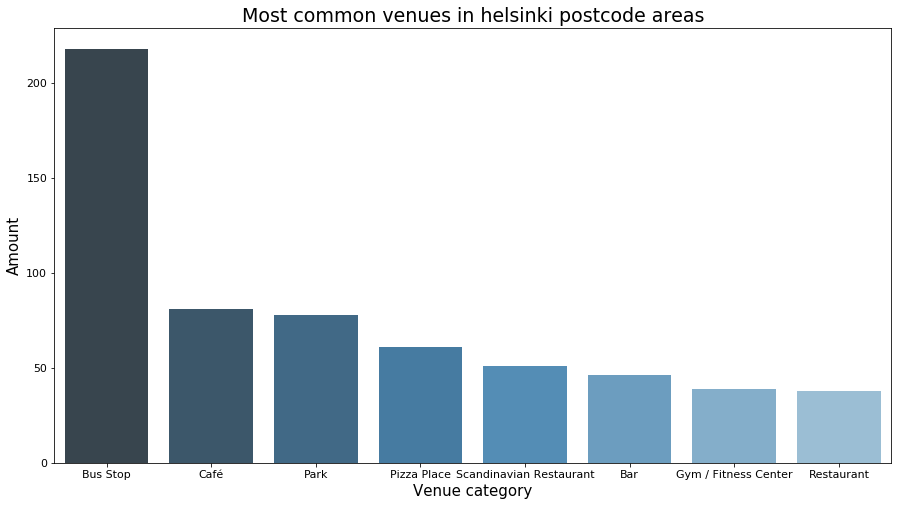

In [64]:

# Making bar plot
plt.subplots(figsize=(15,8))
sns.barplot(x = "Venue_category", y = "Venue", data = hel_ven2_top.reset_index(), palette = "Blues_d", )
plt.title('Most common venues in helsinki postcode areas', fontsize = 19)
plt.xlabel('Venue category', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.tick_params(labelsize=11)


In [65]:
# Let's also look how many venues each postcode area has
hel_ven_count = hel_ven.groupby('Postcode').count().reset_index()
hel_ven_count[['Postcode', 'Venue']]

,Postcode,Venue
0,00100,100
1,00120,100
2,00130,100
3,00140,97
4,00150,100
5,00160,61
6,00170,100
7,00180,100
8,00200,36
9,00210,34


In [66]:
print('Amount of unique venue categories is {} '.format(len(hel_ven['Venue_category'].unique())))

Amount of unique venue categories is 317 


---
<h2>Data pre processing for machine learning

In [68]:
hel_ven.head()

,Postcode,Postcode_latitude,Postcode_longitude,Venue,Venue_latitude,Venue_longitude,Venue_category
0,00520,60.198406,24.940994,Mäkelänrinteen uintikeskus,60.199822,24.947246,Pool
1,00520,60.198406,24.940994,Thai-Asia Take-Away,60.198093,24.940773,Thai Restaurant
2,00520,60.198406,24.940994,El Ático & Amigos del Tango,60.196148,24.941445,Dance Studio
3,00520,60.198406,24.940994,African Pots,60.197754,24.949462,African Restaurant
4,00520,60.198406,24.940994,Cave Boulderkeskus,60.195949,24.932280,Climbing Gym


In [107]:
# Sort by postcode for later merging to other dataframe
df_df.sort_values(by='Postcode', ascending=1, inplace = True)
df_df.head()

,Square_meter_price,Postcode,Borough,Latitude,Longitude
19,7038,00100,Helsinki Keskusta - Etu-Töölö,60.171384,24.931538
18,7526,00120,Punavuori,60.163222,24.939086
4,7938,00130,Kaartinkaupunki,60.164521,24.948625
17,7945,00140,Kaivopuisto - Ullanlinna,60.157767,24.952463
9,7663,00150,Eira - Hernesaari,60.157040,24.936818


In [70]:
hel_ven.shape

(2594, 7)

In [73]:
# Create dummies for helsinki venues dataframe
helsinki_onehot = pd.get_dummies(hel_ven[['Venue_category']], prefix="", prefix_sep="") 
helsinki_onehot

,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Merge to other dataframe and drop unneeded columns
df_test = pd.concat([hel_ven, helsinki_onehot ], axis=1)
df_test.drop(labels= ['Venue', 'Venue_latitude', 'Venue_longitude', 'Venue_category'], axis= 1, inplace = True)
df_test.head()

,Postcode,Postcode_latitude,Postcode_longitude,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,00520,60.198406,24.940994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00520,60.198406,24.940994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00520,60.198406,24.940994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00520,60.198406,24.940994,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00520,60.198406,24.940994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
lista = list(df_test.columns)[3:]
lista

['ATM',
 'Accessories Store',
 'African Restaurant',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auditorium',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Bay',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Bike Trail',
 'Bistro',
 'Blini House',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Buffet',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Camera Store',
 'Campground',
 'Canal',
 'Candy Store',
 'Caucasian Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Circus School',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College

In [114]:
#Grouping the values by postcode and reindexing 
df_test = df_test.groupby('Postcode')[lista].sum()

In [ ]:
df_test.reset_index(inplace = True)

In [133]:
# Reindexing the other dataframe as well and dropping extra columns
df_df.reset_index(inplace = True)
df_df.head()

,level_0,index,Square_meter_price,Postcode,Borough,Latitude,Longitude
0,0,19,7038,00100,Helsinki Keskusta - Etu-Töölö,60.171384,24.931538
1,1,18,7526,00120,Punavuori,60.163222,24.939086
2,2,4,7938,00130,Kaartinkaupunki,60.164521,24.948625
3,3,17,7945,00140,Kaivopuisto - Ullanlinna,60.157767,24.952463
4,4,9,7663,00150,Eira - Hernesaari,60.157040,24.936818


In [134]:
df_df.drop(labels = ['level_0', 'index'], axis = 1 , inplace = True)
df_df.head()

,Square_meter_price,Postcode,Borough,Latitude,Longitude
0,7038,00100,Helsinki Keskusta - Etu-Töölö,60.171384,24.931538
1,7526,00120,Punavuori,60.163222,24.939086
2,7938,00130,Kaartinkaupunki,60.164521,24.948625
3,7945,00140,Kaivopuisto - Ullanlinna,60.157767,24.952463
4,7663,00150,Eira - Hernesaari,60.157040,24.936818


In [333]:
# Merge together by postcode
df_sa = pd.merge(df_df, df_test, on='Postcode')
df_sa.drop(labels = ['Borough', 'Latitude', 'Longitude'], axis = 1, inplace = True)
df_sa

,Square_meter_price,Postcode,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Total_venues
0,7038,00100,0,0,0,0,0,0,0,2,...,1,0,0,0,2,1,0,1,0,NaN
1,7526,00120,0,0,0,1,1,0,0,3,...,0,0,0,0,3,0,0,2,0,NaN
2,7938,00130,0,0,0,1,1,0,0,2,...,0,0,0,0,1,1,0,0,0,NaN
3,7945,00140,0,0,0,0,1,0,0,0,...,0,0,0,2,1,0,0,0,0,NaN
4,7663,00150,0,0,0,0,1,0,0,0,...,0,0,0,1,2,0,0,1,0,NaN
5,6443,00160,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,NaN
6,7017,00170,0,0,0,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,NaN
7,7354,00180,0,0,0,0,0,0,0,1,...,1,0,0,2,1,0,0,0,0,NaN
8,5911,00200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9,5819,00210,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [338]:
col_list = list(df_sa)
col_list.remove('Square_meter_price')
col_list.remove('Postcode')
df_sa['Total_venues'] = df_sa[col_list].sum(axis=1)
df_sa

,Square_meter_price,Postcode,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Total_venues
0,7038,00100,0,0,0,0,0,0,0,2,...,1,0,0,0,2,1,0,1,0,100
1,7526,00120,0,0,0,1,1,0,0,3,...,0,0,0,0,3,0,0,2,0,100
2,7938,00130,0,0,0,1,1,0,0,2,...,0,0,0,0,1,1,0,0,0,100
3,7945,00140,0,0,0,0,1,0,0,0,...,0,0,0,2,1,0,0,0,0,97
4,7663,00150,0,0,0,0,1,0,0,0,...,0,0,0,1,2,0,0,1,0,100
5,6443,00160,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,61
6,7017,00170,0,0,0,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,100
7,7354,00180,0,0,0,0,0,0,0,1,...,1,0,0,2,1,0,0,0,0,100
8,5911,00200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
9,5819,00210,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34


In [381]:
# look for how many venues there is of certain type
for item in lista:
    jeejee = df_sa[item].sum()
    if jeejee in list(range(10, 1000)):
        print(jeejee , ' for ' , item)


11  for  Art Gallery
10  for  Art Museum
41  for  Bakery
65  for  Bar
19  for  Beach
34  for  Beer Bar
14  for  Bistro
10  for  Buffet
234  for  Bus Stop
16  for  Cafeteria
114  for  Café
28  for  Chinese Restaurant
11  for  Clothing Store
12  for  Cocktail Bar
62  for  Coffee Shop
19  for  Convenience Store
19  for  Dog Run
11  for  Falafel Restaurant
15  for  Flea Market
12  for  Flower Shop
13  for  French Restaurant
11  for  Furniture / Home Store
14  for  Garden
10  for  Gastropub
66  for  Grocery Store
34  for  Gym
51  for  Gym / Fitness Center
18  for  Harbor / Marina
25  for  Himalayan Restaurant
39  for  Hotel
14  for  Ice Cream Shop
14  for  Indian Restaurant
11  for  Indie Movie Theater
20  for  Italian Restaurant
12  for  Japanese Restaurant
17  for  Liquor Store
16  for  Middle Eastern Restaurant
11  for  Music Venue
104  for  Park
19  for  Pharmacy
87  for  Pizza Place
31  for  Playground
27  for  Plaza
13  for  Pool
20  for  Pub
37  for  Recreation Center
50  for  Restau

In [383]:
# Dropping non relevant venues away to avoid overfitting
new_list = []
for item in lista:
    jeejee = df_sa[item].sum()
    if jeejee in list(range(10, 1000)):
        new_list.append(item)

new_list2 = ['Square_meter_price', 'Postcode', 'Borough', 'Latitude', 'Longitude'] + new_list
new_list3 = list(df_sa.columns)
new_list4 = []
for item in new_list3:
    if item not in new_list2:
        new_list4.append(item)
df_sa2 = df_sa.drop(labels= new_list4, axis= 1)
df_sa2['Total_venues'] = df_sa[col_list].sum(axis=1)
df_sa2.head()

,Square_meter_price,Postcode,Art Gallery,Art Museum,Bakery,Bar,Beach,Beer Bar,Bistro,Buffet,...,Soccer Field,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Tram Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Total_venues
0,7038,00100,2,3,3,2,0,0,0,0,...,0,1,2,0,0,0,0,1,2,100
1,7526,00120,3,0,4,4,0,5,1,0,...,0,0,3,0,1,0,1,0,3,100
2,7938,00130,2,1,0,3,0,2,0,0,...,0,0,2,0,0,0,2,0,1,100
3,7945,00140,0,1,0,0,0,1,2,0,...,0,0,1,1,1,0,0,0,1,97
4,7663,00150,0,0,3,2,1,3,2,0,...,0,0,2,0,2,0,0,0,2,100


In [384]:
df_sa2.shape

(73, 64)

---
<h2>Create the training set and test set

In [394]:
X = df_sa2.iloc[:, 2:].values
y = df_sa2.iloc[:, 0].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


---
<h2>Multiple lineal regression with backward elimination

In [247]:


import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [395]:


# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

import statsmodels.regression.linear_model as sm
X = np.append(arr= np.ones((73, 1)).astype(int), values = X, axis = 1)
#lista_taas = list(range(0, len(list(X))-2))
lista_taas = list(range(0,62))                                   # What is right kind of list here?
X_opt = X[:, lista_taas]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6.138
Date:                Mon, 18 Nov 2019   Prob (F-statistic):            0.00117
Time:                        18:19:43   Log-Likelihood:                -508.57
No. Observations:                  73   AIC:                             1141.
Df Residuals:                      11   BIC:                             1283.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3218.3348    362.249      8.884      0.000    2421.031    4015.639
x1         -1944.1314   2838.614     -0.685      0.508   -8191.878    4303.615
x2          3466.5897   2140.338      1.620      0.134   -1244.263    8177.442
x3          -240.4714    979.665     -0.245      0.811   -2396.699    1915.757
x4          1436.1884    599.682      2.395      0.036     116.298    2756.079
x5           160.8510    416.728      0.386      0.707    -756.361    1078.063
x6          1822.8983   1126.559      1.618      0.134    -656.641    4302.438
x7          3114.0480   2185.910      1.425      0.182   -1697.108    7925.204
x8          -421.0743    988.001     -0.426      0.678   -2595.651    1753.502
x9             0.8957     93.299      0.010      0.993    -204.455     206.246
x10          702.6975    537.073      1.308      0.217    -479.391    1884.786
x11          114.0366    259.882      0.439      0.669    -457.959     686.033
x12          156.0304    549.888      0.284      0.782   -1054.265    1366.326
x13         -249.7477    671.643     -0.372      0.717   -1728.025    1228.530
x14         -191.2440    986.334     -0.194      0.850   -2362.150    1979.662
x15           61.6414    372.749      0.165      0.872    -758.773     882.055
x16          771.5043    581.531      1.327      0.211    -508.437    2051.446
x17         1426.2232    634.187      2.249      0.046      30.387    2822.059
x18        -1496.3016   1097.516     -1.363      0.200   -3911.919     919.316
x19         -161.3575    389.237     -0.415      0.686   -1018.062     695.347
x20          -64.0519    410.088     -0.156      0.879    -966.649     838.545
x21        -1606.5407   1787.504     -0.899      0.388   -5540.809    2327.728
x22         -508.8721    612.757     -0.830      0.424   -1857.542     839.798
x23          811.3370    388.382      2.089      0.061     -43.486    1666.160
x24        -2365.4575   1519.009     -1.557      0.148   -5708.774     977.859
x25         -704.6703    338.750     -2.080      0.062   -1450.255      40.914
x26          787.0813    577.090      1.364      0.200    -483.086    2057.248
x27         1010.6120    389.998      2.591      0.025     152.233    1868.991
x28          418.8238    282.644      1.482      0.166    -203.271    1040.919
x29           55.6672    847.181      0.066      0.949   -1808.965    1920.299
x30          728.5160   1304.882      0.558      0.588   -2143.509    3600.541
x31          663.9546   1248.955      0.532      0.606   -2084.978    3412.887
x32          249.0269    603.926      0.412      0.688   -1080.206    1578.259
x33         1873.5974   2812.372      0.666      0.519   -4316.391    8063.586
x34         -696.0558   1341.118     -0.519      0.614   -3647.836    2255.725
x35        -1664.6937   2729.329     -0.610      0.554   -7671.907    4342.520
x3

In [398]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 8,
 10,
 16,
 17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     15.51
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           7.43e-14
Time:                        18:28:42   Log-Likelihood:                -539.83
No. Observations:                  73   AIC:                             1150.
Df Residuals:                      38   BIC:                             1230.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3290.1464    155.827     21.114      0.000    2974.691    3605.601
x1          1642.2098    386.031      4.254      0.000     860.732    2423.688
x2           733.4658    129.671      5.656      0.000     470.961     995.970
x3           850.9945    230.954      3.685      0.001     383.452    1318.537
x4          1409.8836    421.494      3.345      0.002     556.613    2263.154
x5            37.1851    194.371      0.191      0.849    -356.298     430.668
x6           272.8861    197.100      1.385      0.174    -126.121     671.893
x7           623.6649    214.702      2.905      0.006     189.023    1058.307
x8          1036.8619    256.346      4.045      0.000     517.916    1555.808
x9         -1460.5279    448.793     -3.254      0.002   -2369.062    -551.994
x10         -584.1914    476.988     -1.225      0.228   -1549.803     381.420
x11          152.2191    236.376      0.644      0.523    -326.300     630.738
x12          527.0075    213.284      2.471      0.018      95.237     958.778
x13         -512.5602    353.120     -1.452      0.155   -1227.415     202.294
x14         -350.1234    108.367     -3.231      0.003    -569.500    -130.747
x15          349.1298    136.625      2.555      0.015      72.548     625.712
x16          774.7634    121.716      6.365      0.000     528.363    1021.164
x17          395.3118    143.490      2.755      0.009     104.831     685.793
x18         -810.4261    263.956     -3.070      0.004   -1344.777    -276.075
x19        -2129.3873    339.144     -6.279      0.000   -2815.948   -1442.826
x20         -594.0677    123.730     -4.801      0.000    -844.546    -343.589
x21          483.9669    138.295      3.500      0.001     204.003     763.930
x22         -205.5956    146.345     -1.405      0.168    -501.855      90.663
x23         -606.2269    347.188     -1.746      0.089   -1309.072      96.618
x24           21.9340    209.594      0.105      0.917    -402.367     446.235
x25          -29.5540    134.135     -0.220      0.827    -301.096     241.988
x26         -248.1606    130.304     -1.904      0.064    -511.947      15.625
x27         -375.0168    377.792     -0.993      0.327   -1139.816     389.782
x28          653.0276    143.231      4.559      0.000     363.071     942.984
x29          579.1106    239.947      2.413      0.021      93.364    1064.858
x30          418.0968    109.400      3.822      0.000     196.628     639.566
x31         -723.2776    143.978     -5.024      0.000   -1014.747    -431.808
x32         1149.0193    219.882      5.226      0.000     703.892    1594.147
x33         -549.1659    228.043     -2.408      0.021   -1010.815     -87.517
x34        -1298.4398    505.096     -2.571      0.014   -2320.953    -275.927
==============================================================================
Om

In [399]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 10,
 16,
 17,
 18,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 43,
 44,
 47,
 49,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           2.90e-16
Time:                        18:32:09   Log-Likelihood:                -540.35
No. Observations:                  73   AIC:                             1143.
Df Residuals:                      42   BIC:                             1214.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3284.7579    144.699     22.701      0.000    2992.744    3576.772
x1          1698.0738    322.380      5.267      0.000    1047.485    2348.663
x2           720.7455    120.260      5.993      0.000     478.051     963.440
x3           852.0887    203.867      4.180      0.000     440.668    1263.510
x4          1431.4107    337.998      4.235      0.000     749.303    2113.518
x5           299.9086    165.064      1.817      0.076     -33.204     633.022
x6           627.1439    165.487      3.790      0.000     293.177     961.111
x7          1012.1453    243.191      4.162      0.000     521.366    1502.924
x8         -1472.1557    399.055     -3.689      0.001   -2277.480    -666.831
x9          -581.7574    440.932     -1.319      0.194   -1471.593     308.078
x10          536.3524    196.275      2.733      0.009     140.254     932.451
x11         -529.4931    329.782     -1.606      0.116   -1195.020     136.034
x12         -363.3527     94.758     -3.835      0.000    -554.582    -172.124
x13          349.7666    124.713      2.805      0.008      98.087     601.447
x14          778.1081    107.260      7.254      0.000     561.648     994.568
x15          398.6753    137.177      2.906      0.006     121.841     675.510
x16         -767.4095    240.552     -3.190      0.003   -1252.863    -281.956
x17        -2125.4007    316.199     -6.722      0.000   -2763.516   -1487.285
x18         -581.4470    104.968     -5.539      0.000    -793.280    -369.614
x19          480.8496    131.593      3.654      0.001     215.285     746.414
x20         -184.5708    134.409     -1.373      0.177    -455.818      86.677
x21         -535.6592    285.344     -1.877      0.067   -1111.507      40.189
x22         -249.5806    118.869     -2.100      0.042    -489.468      -9.693
x23         -401.9657    355.274     -1.131      0.264   -1118.937     315.006
x24          643.9805    133.947      4.808      0.000     373.665     914.296
x25          570.0905    221.415      2.575      0.014     123.257    1016.924
x26          410.1299    102.195      4.013      0.000     203.892     616.367
x27         -725.5269    132.811     -5.463      0.000    -993.550    -457.504
x28         1138.9567    207.572      5.487      0.000     720.060    1557.854
x29         -524.5029    194.207     -2.701      0.010    -916.429    -132.577
x30        -1281.8029    446.120     -2.873      0.006   -2182.110    -381.496
==============================================================================
Omnibus:                        3.976   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.230
Skew:                           0.400   Prob(JB):                        0.199
Kurtosis:                       2.350   Cond. No.                         48.4
==

In [400]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 10,
 16,
 17,
 18,
 23,
 24,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 43,
 44,
 47,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     20.10
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           4.94e-17
Time:                        18:35:21   Log-Likelihood:                -542.61
No. Observations:                  73   AIC:                             1143.
Df Residuals:                      44   BIC:                             1210.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3266.7216    144.748     22.568      0.000    2975.002    3558.441
x1          1521.4820    306.092      4.971      0.000     904.593    2138.371
x2           673.8824    108.027      6.238      0.000     456.169     891.596
x3           709.4117    185.681      3.821      0.000     335.196    1083.627
x4          1194.8360    298.407      4.004      0.000     593.437    1796.235
x5           235.3426    159.562      1.475      0.147     -86.234     556.919
x6           583.0960    164.367      3.548      0.001     251.835     914.357
x7          1018.5952    236.933      4.299      0.000     541.087    1496.103
x8         -1205.8275    363.370     -3.318      0.002   -1938.151    -473.504
x9           564.0160    183.670      3.071      0.004     193.854     934.178
x10         -389.8270    311.352     -1.252      0.217   -1017.316     237.662
x11         -329.3768     93.034     -3.540      0.001    -516.874    -141.880
x12          377.6613    123.595      3.056      0.004     128.573     626.750
x13          781.8913    107.641      7.264      0.000     564.955     998.827
x14          407.0144    137.092      2.969      0.005     130.724     683.305
x15         -807.5689    239.300     -3.375      0.002   -1289.846    -325.291
x16        -2059.6615    305.249     -6.747      0.000   -2674.851   -1444.472
x17         -557.2893    103.878     -5.365      0.000    -766.643    -347.936
x18          446.8635    129.696      3.445      0.001     185.478     708.249
x19         -192.1337    132.469     -1.450      0.154    -459.107      74.840
x20         -376.5787    270.289     -1.393      0.171    -921.311     168.153
x21         -191.0413    112.852     -1.693      0.098    -418.479      36.396
x22          537.2751    105.082      5.113      0.000     325.497     749.053
x23          543.6702    221.909      2.450      0.018      96.443     990.898
x24          392.1041    101.630      3.858      0.000     187.282     596.926
x25         -687.5830    130.950     -5.251      0.000    -951.496    -423.670
x26          989.3283    182.662      5.416      0.000     621.197    1357.460
x27         -489.2903    152.233     -3.214      0.002    -796.095    -182.485
x28        -1242.1714    435.252     -2.854      0.007   -2119.364    -364.979
==============================================================================
Omnibus:                        4.283   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                2.838
Skew:                           0.306   Prob(JB):                        0.242
Kurtosis:                       2.252   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [401]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 10,
 16,
 17,
 18,
 23,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 43,
 44,
 47,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           2.24e-17
Time:                        18:36:56   Log-Likelihood:                -543.89
No. Observations:                  73   AIC:                             1144.
Df Residuals:                      45   BIC:                             1208.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3291.0646    144.338     22.801      0.000    3000.354    3581.776
x1          1332.9845    268.184      4.970      0.000     792.834    1873.135
x2           661.1088    108.220      6.109      0.000     443.142     879.075
x3           594.7387    162.536      3.659      0.001     267.374     922.104
x4          1047.4284    275.923      3.796      0.000     491.690    1603.166
x5           241.2374    160.495      1.503      0.140     -82.017     564.492
x6           541.6986    162.020      3.343      0.002     215.374     868.023
x7           962.9641    234.193      4.112      0.000     491.275    1434.653
x8         -1050.5532    343.699     -3.057      0.004   -1742.798    -358.308
x9           580.7970    184.332      3.151      0.003     209.533     952.061
x10         -330.2645     93.616     -3.528      0.001    -518.817    -141.712
x11          392.6407    123.788      3.172      0.003     143.320     641.962
x12          754.7902    106.105      7.114      0.000     541.084     968.497
x13          420.6720    137.516      3.059      0.004     143.700     697.644
x14         -786.9201    240.232     -3.276      0.002   -1270.772    -303.068
x15        -1949.5478    294.143     -6.628      0.000   -2541.983   -1357.113
x16         -549.3445    104.336     -5.265      0.000    -759.489    -339.200
x17          405.9738    126.306      3.214      0.002     151.580     660.368
x18         -171.8805    132.304     -1.299      0.201    -438.355      94.594
x19         -296.6751    264.298     -1.123      0.268    -828.999     235.649
x20         -176.1749    112.931     -1.560      0.126    -403.629      51.280
x21          544.1941    105.596      5.154      0.000     331.513     756.875
x22          556.3841    223.070      2.494      0.016     107.098    1005.670
x23          385.7827    102.143      3.777      0.000     180.057     591.508
x24         -678.8269    131.586     -5.159      0.000    -943.854    -413.800
x25          873.6413    158.560      5.510      0.000     554.285    1192.997
x26         -517.9998    151.442     -3.420      0.001    -823.020    -212.980
x27        -1029.4921    403.256     -2.553      0.014   -1841.692    -217.292
==============================================================================
Omnibus:                        3.952   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.291
Skew:                           0.412   Prob(JB):                        0.193
Kurtosis:                       2.366   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 10,
 16,
 17,
 18,
 23,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 47,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     21.67
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.81e-18
Time:                        18:38:23   Log-Likelihood:                -546.11
No. Observations:                  73   AIC:                             1144.
Df Residuals:                      47   BIC:                             1204.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3288.1542    144.654     22.731      0.000    2997.147    3579.161
x1          1333.8321    266.182      5.011      0.000     798.343    1869.321
x2           627.2063    107.070      5.858      0.000     411.809     842.604
x3           600.6629    163.277      3.679      0.001     272.192     929.133
x4          1116.1991    272.634      4.094      0.000     567.730    1664.668
x5           174.0498    149.269      1.166      0.249    -126.241     474.341
x6           528.5322    163.230      3.238      0.002     200.155     856.909
x7          1007.3624    225.828      4.461      0.000     553.056    1461.669
x8         -1021.2879    339.808     -3.005      0.004   -1704.894    -337.682
x9           590.9061    185.119      3.192      0.003     218.496     963.317
x10         -341.8825     93.301     -3.664      0.001    -529.579    -154.186
x11          376.9026    119.482      3.154      0.003     136.536     617.270
x12          707.0674    102.871      6.873      0.000     500.118     914.016
x13          457.0285    135.627      3.370      0.002     184.183     729.874
x14         -719.9870    234.375     -3.072      0.004   -1191.490    -248.485
x15        -1838.2848    287.502     -6.394      0.000   -2416.665   -1259.904
x16         -548.7854    105.004     -5.226      0.000    -760.026    -337.545
x17          397.1593    127.220      3.122      0.003     141.226     653.092
x18         -201.5205    104.923     -1.921      0.061    -412.599       9.558
x19          488.6002    101.124      4.832      0.000     285.164     692.036
x20          416.3977    208.201      2.000      0.051      -2.448     835.244
x21          377.1074    102.726      3.671      0.001     170.449     583.766
x22         -678.4660    132.725     -5.112      0.000    -945.475    -411.457
x23          899.4485    158.721      5.667      0.000     580.142    1218.755
x24         -489.7112    149.798     -3.269      0.002    -791.066    -188.357
x25        -1103.1665    401.430     -2.748      0.008   -1910.740    -295.593
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.297
Skew:                           0.145   Prob(JB):                        0.862
Kurtosis:                       2.886   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:

X_opt = X[:, [0,
 2,
 4,
 6,
 7,
 16,
 17,
 18,
 23,
 25,
 26,
 27,
 28,
 36,
 37,
 39,
 42,
 47,
 50,
 52,
 53,
 54,
 55,
 60,
 61]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     22.35
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.50e-18
Time:                        18:39:40   Log-Likelihood:                -547.15
No. Observations:                  73   AIC:                             1144.
Df Residuals:                      48   BIC:                             1202.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3264.5076    143.761     22.708      0.000    2975.456    3553.559
x1          1351.9983    266.719      5.069      0.000     815.724    1888.273
x2           645.8224    106.269      6.077      0.000     432.154     859.490
x3           568.0357    161.463      3.518      0.001     243.393     892.678
x4          1175.6739    268.821      4.373      0.000     635.173    1716.175
x5           511.0017    163.144      3.132      0.003     182.978     839.025
x6          1116.5621    206.261      5.413      0.000     701.846    1531.278
x7         -1035.4396    340.861     -3.038      0.004   -1720.787    -350.092
x8           676.8857    170.433      3.972      0.000     334.206    1019.565
x9          -347.0194     93.545     -3.710      0.001    -535.104    -158.935
x10          427.9726    111.581      3.836      0.000     203.625     652.320
x11          700.6243    103.106      6.795      0.000     493.316     907.933
x12          469.3981    135.717      3.459      0.001     196.522     742.275
x13         -604.7245    213.304     -2.835      0.007   -1033.600    -175.849
x14        -1904.8427    282.832     -6.735      0.000   -2473.515   -1336.170
x15         -560.0705    104.948     -5.337      0.000    -771.082    -349.059
x16          387.5589    127.428      3.041      0.004     131.349     643.769
x17         -215.4788    104.628     -2.059      0.045    -425.847      -5.110
x18          453.5250     96.908      4.680      0.000     258.679     648.371
x19          454.9355    206.329      2.205      0.032      40.083     869.788
x20          379.1643    103.095      3.678      0.001     171.878     586.451
x21         -699.4996    131.985     -5.300      0.000    -964.874    -434.125
x22          937.2630    155.954      6.010      0.000     623.697    1250.829
x23         -456.2179    147.568     -3.092      0.003    -752.923    -159.513
x24        -1004.7346    393.921     -2.551      0.014   -1796.765    -212.704
==============================================================================
Omnibus:                        0.437   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.415
Skew:                           0.174   Prob(JB):                        0.813
Kurtosis:                       2.874   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
<h2>Finding the statistically relevant venues<h2>
   <h4> The venues that correlates with apartment prices with the certainty of P-value < 0.05

In [428]:

tester_df = df_sa2.drop(labels= ['Square_meter_price','Postcode'], axis = 1)
tester_df_list = list(tester_df.columns)
tester_df_list2 = [0,2,4,6,7,16,17,18,23,25,26,27,28,36,37,39,42,47,50,52,53,54,55,60,61]

tester_df_list3 = []
for number in tester_df_list2:
    tester_df_list3.append(tester_df_list[number])
tester_df_list3

['Art Gallery',
 'Bakery',
 'Beach',
 'Bistro',
 'Buffet',
 'Dog Run',
 'Falafel Restaurant',
 'Flea Market',
 'Gastropub',
 'Gym',
 'Gym / Fitness Center',
 'Harbor / Marina',
 'Himalayan Restaurant',
 'Middle Eastern Restaurant',
 'Music Venue',
 'Pharmacy',
 'Plaza',
 'Sandwich Place',
 'Scenic Lookout',
 'Soccer Field',
 'Supermarket',
 'Sushi Restaurant',
 'Thai Restaurant',
 'Wine Bar',
 'Total_venues']

<h2>Accuracy of the predictive model

In [430]:
last_df = pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)], axis=1)
last_df.columns = ['predicted', 'test_set']
last_df['predicted / test'] = last_df.predicted / last_df.test_set
calcs = []
for row in last_df['predicted / test']:
    calcs.append(abs(row-1))
calcs2 = []
for row in last_df['predicted / test']:
    calcs2.append(row-1)
last_df['error2'] = calcs2
last_df['average distance'] =  last_df.error2.mean()
last_df['error'] = calcs
last_df['avg_error %'] = last_df.error.mean()*last_df.error2.mean()/abs(last_df.error2.mean())
last_df

# "avg_error %" tells how far away from truth the y-hats are on average. This model was 27.4 percent away on average

,predicted,test_set,predicted / test,error2,average distance,error,avg_error %
0,5649.685649,3325,1.699154,0.699154,0.101688,0.699154,0.27401
1,2810.750501,2053,1.369094,0.369094,0.101688,0.369094,0.27401
2,4231.726563,3271,1.293710,0.293710,0.101688,0.293710,0.27401
3,3062.041386,3791,0.807713,-0.192287,0.101688,0.192287,0.27401
4,3509.731768,3395,1.033794,0.033794,0.101688,0.033794,0.27401
5,3298.859945,2849,1.157901,0.157901,0.101688,0.157901,0.27401
6,2493.491677,2396,1.040689,0.040689,0.101688,0.040689,0.27401
7,2944.147721,2657,1.108072,0.108072,0.101688,0.108072,0.27401
8,6007.271138,5554,1.081612,0.081612,0.101688,0.081612,0.27401
9,10615.077250,7354,1.443443,0.443443,0.101688,0.443443,0.27401
